In [8]:
def armamle(X, theta0, p):
    theta, logl = steepdescent(X, theta0, p)
    q = len(theta0) - 2 - p
    T = len(X)
    alpha, beta = theta[:p], theta[p:p + q]
    sigma, c = theta[p + q], theta[p + q + 1]
    e = np.zeros(T)
    m = max(p, q)
    for j in range(m, T):
        e[j] = X[j] - c - np.dot(alpha.T, X[j - p:j][::-1]) - np.dot(beta.T, e[j - q:j][::-1])
    res = e
    logl = -logl
    return theta, logl, res


def steepdescent(Xx, theta0, p0):
    itr = 200
    maxi = 20
    tol = 1.0e-8
    lmbda = 1.0e-3
    j = 0
    th = theta0
    #likelihood
    Fnc = lharma(th, Xx, p0)
    #Gradient of ARMA
    grad = garma(th, Xx, p0)
    
    while (np.linalg.norm(grad) >= tol) & (j < itr):
        step = -grad
        gstp = np.dot(grad.T, step)
        gama = min(1, 1 / np.linalg.norm(step))
        i = 1
        while (lharma(th + gama * step, Xx, p0)) > (Fnc + gama * lmbda * gstp):
            i += 1
            gama = gama / 2
            if i > maxi:
                break
        th = th + gama * step
        Fnc = lharma(th, Xx, p0)
        grad = garma(th, Xx, p0)
        j += 1
    return th, Fnc


def lharma(theta0, X, p):
    q = len(theta0) - 2 - p
    T = len(X)
    alpha, beta = theta0[:p], theta0[p:p + q]
    sigma, c = theta0[p + q], theta0[p + q + 1]
    y = 0
    e = np.zeros(T)
    m = max(p, q)
    for j in range(m, T):
        e[j] = X[j] - c - np.dot(alpha.T, X[j - p:j][::-1]) - np.dot(beta.T, e[j - q:j][::-1])
        y += e[j] ** 2
    y = y / (2 * sigma ** 2)
    y += np.log(sigma ** 2) * (T - m) / 2 + np.log(2 * np.pi) * (T - m) / 2
    return y


def garma(theta0, X, p):
    h = 0.0001
    nw = len(theta0)
    gval = np.zeros(nw)
    for i in range(nw):
        xph = theta0.copy()
        xph[i] = theta0[i] + h
        fxph = lharma(xph, X, p)
        xmh = theta0.copy()
        xmh[i] = theta0[i] - h
        fxmh = lharma(xmh, X, p)
        gval[i] = (fxph - fxmh) / (2 * h)
    return gval


Date
2018-03-26 00:00:00-04:00    2658.550049
2018-03-27 00:00:00-04:00    2612.620117
2018-03-28 00:00:00-04:00    2605.000000
2018-03-29 00:00:00-04:00    2640.870117
2018-04-02 00:00:00-04:00    2581.879883
                                ...     
2023-03-20 00:00:00-04:00    3951.570068
2023-03-21 00:00:00-04:00    4002.870117
2023-03-22 00:00:00-04:00    3936.969971
2023-03-23 00:00:00-04:00    3948.719971
2023-03-24 00:00:00-04:00    3970.989990
Name: Close, Length: 1259, dtype: float64
Date
2018-03-26 00:00:00-04:00         NaN
2018-03-27 00:00:00-04:00   -0.017276
2018-03-28 00:00:00-04:00   -0.002917
2018-03-29 00:00:00-04:00    0.013770
2018-04-02 00:00:00-04:00   -0.022337
                               ...   
2023-03-20 00:00:00-04:00    0.008918
2023-03-21 00:00:00-04:00    0.012982
2023-03-22 00:00:00-04:00   -0.016463
2023-03-23 00:00:00-04:00    0.002985
2023-03-24 00:00:00-04:00    0.005640
Name: returns, Length: 1259, dtype: float64


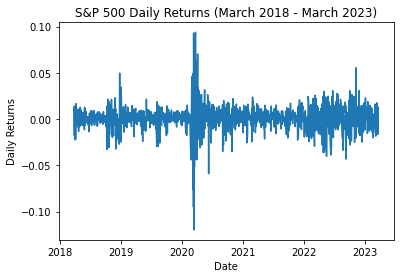

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

symbol = "^GSPC"
start_date = "2018-03-26"
end_date = "2023-03-25"

ticker = yf.Ticker(symbol)
data = ticker.history(start=start_date, end=end_date, interval="1d", auto_adjust=True)

print(data["Close"])

data["returns"] = data["Close"].pct_change()
print(data["returns"])

# Plot line chart of returns
plt.plot(data.index, data["returns"])
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("S&P 500 Daily Returns (March 2018 - March 2023)")
plt.show()

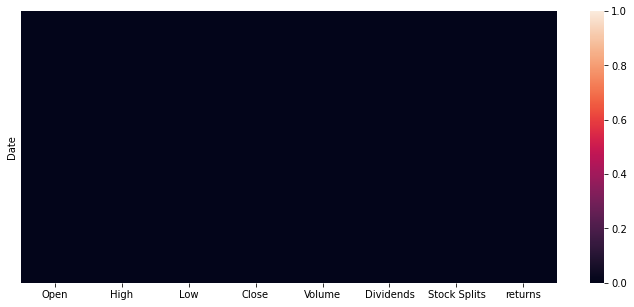

[2658.55004883 2612.62011719 2605.         ... 3936.9699707  3948.7199707
 3970.98999023]
shape of close values (1259,)


1259

In [10]:
import seaborn as sns

# Can clearly see that there are no missing values 
#one of the advantages of taking stock data is that it requires minimal data preprocessing

plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()
 
close_values = data["Close"].values

print(close_values)

print("shape of close values",close_values.shape)

len(close_values)

In [11]:
#Do min-max scaling
x_minmax = close_values
x_meanstd = close_values

ymin = np.min(x_minmax)
ymax = np.max(x_minmax)


close_values_minmax = 2*((x_minmax-ymin)/(ymax-ymin)-0.5)

print("Values after Min-Max Scaling",close_values_minmax.shape)

#Do mean and std scaling
print("x_meanstd:",x_meanstd)

ymean = np.mean(x_meanstd)
ystd = np.std(x_meanstd)

close_values_meanstd = ((x_meanstd-ymean)/ystd)*0.5

print("Values after Mean-Std Scaling",close_values_meanstd)

Values after Min-Max Scaling (1259,)
x_meanstd: [2658.55004883 2612.62011719 2605.         ... 3936.9699707  3948.7199707
 3970.98999023]
Values after Mean-Std Scaling [-0.64303497 -0.67786022 -0.68363798 ...  0.32629564  0.33520479
  0.35209049]


X: [-0.64303497 -0.67786022 -0.68363798 ...  0.32629564  0.33520479
  0.35209049]
The shape of X: (1259,)
Model Estimates
[ 9.91742246e-01  3.53707806e-01  3.26396685e-01 -3.66701519e-02
  6.65089513e-04]


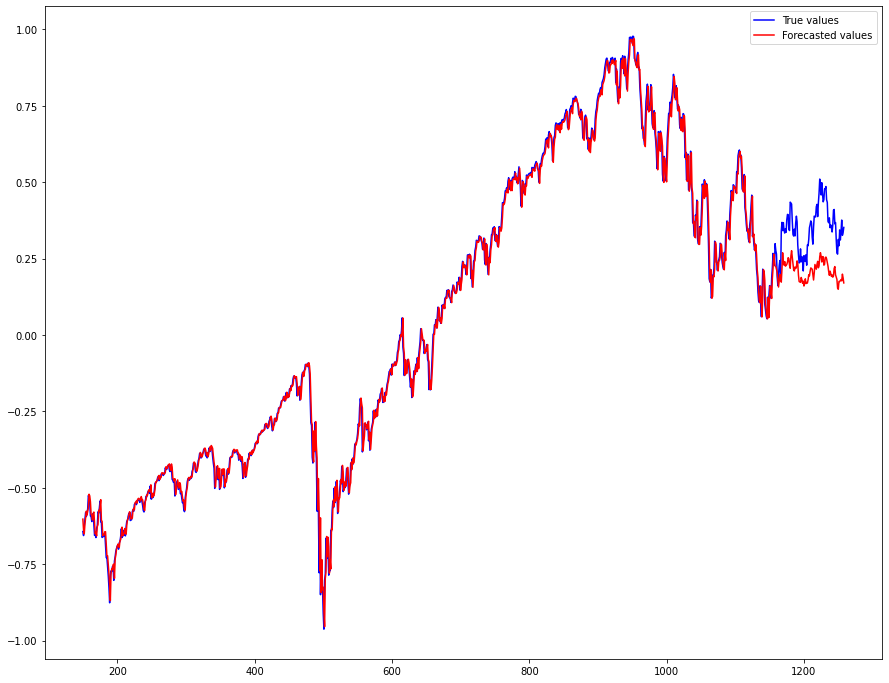

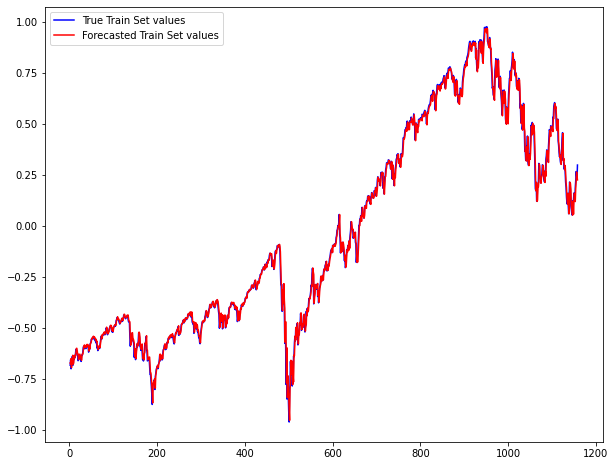

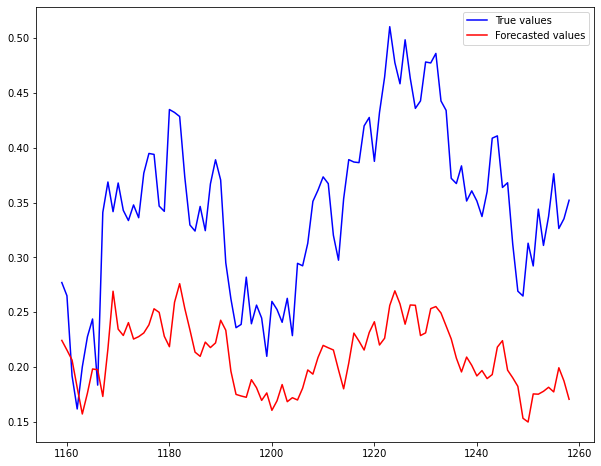

Mean Squared Error: 0.0011674018890130361
sum Squared Error: 1.4697589782674125


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

T = len(close_values_meanstd) -100
n=100
p=1
q=2
m = max(p,q)
X = close_values_meanstd


print("X:",X)
print("The shape of X:",X.shape)

theta0 = np.array([0.5, 0.4, 0.3, 0.8, 0.01])

theta, logl, res = armamle(X[:T], theta0, p)


print("Model Estimates")
#print(theta_true)
print(theta)

alpha = theta[:p]
beta = theta[p:p + q]
sigma = theta[p + q]
c = 0


y = np.zeros(T + n)
er = np.zeros(T + n)

for j in range(m, T):
    y[j] = c + (alpha.T).dot(X[j - p:j][::-1]) + (beta.T).dot(er[j - q:j][::-1])

for j in range(T, T + n):
    y[j] = c + (alpha.T).dot(y[j - p:j][::-1]) + (beta.T).dot(er[j - q:j][::-1])
    er[j] = X[j] - c - (alpha.T).dot(X[j - p:j][::-1]) - (beta.T).dot(er[j - q:j][::-1])

plt.figure(figsize=(15,12))
plt.plot(range(150, T + n), X[150:T + n], 'b', label="True values")
plt.plot(range(150, T + n), y[150:T + n], 'r', label="Forecasted values")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(range(m, T), X[m:T], 'b', label="True Train Set values")
plt.plot(range(m, T), y[m:T], 'r', label="Forecasted Train Set values")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(range(T, T + n), X[T:T + n], 'b', label="True values")
plt.plot(range(T, T + n), y[T:T + n], 'r', label="Forecasted values")
plt.legend()
plt.show()

mse = np.mean((y[m:T] - X[m:T])**2)
print("Mean Squared Error:", mse)

sse = mse * (1259)
print("sum Squared Error:", sse)